##                    ANALYSING THE INCOME PREDICTION DATASET

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset into a pandas dataframe

In [3]:
income=pd.read_csv("incomeData.csv.xls")
print("Dataset imported successfully")
#view summary of dataset
income.info()

Dataset imported successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nan             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### check shape of the dataset

In [4]:
df_shape=income.shape
print(f"shape {df_shape}")

shape (32561, 15)



### print column names

In [5]:
df_columns=income.columns
print(df_columns)

Index(['nan', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')


In [6]:
#print first 5 rows of the dataset
income.head()

,nan,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Renaming nan column

In [7]:
income = income.rename(columns={'nan': 'Age'})
income.head()

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
income['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [9]:
income['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [10]:
income['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In this dataset,the columns "workclass","occupation" and "native_country" have some values of "?".This can be handled by filling in the missing values for the "?"  fields with the mode of the appropriate columns

### Handling missing values

In [11]:
income.replace("?", np.nan, inplace=True)

#fill missing values in "workclass" column with mode
mode_wrkclass=income["workclass"].mode()[0]
income['workclass'].fillna(mode_wrkclass, inplace=True)

#fill missing values in "occupation" column with mode
mode_occupation=income["occupation"].mode()[0]
income['occupation'].fillna(mode_occupation, inplace=True)

#fill missing values in "native_country" column with mode
mode_native_country=income["native-country"].mode()[0]
income['native-country'].fillna(mode_native_country, inplace=True)

In [12]:
#checking missing values
income.isnull().sum()

Age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [13]:
#Convert a Series or DataFrame column to numeric type
numeric_cols=['Age',"fnlwgt",'education-num','capital-gain','capital-loss',"hours-per-week"]
income[numeric_cols]=income[numeric_cols].apply(pd.to_numeric)

In [14]:
#drop unnecessary columns
income.drop(['fnlwgt'],axis=1,inplace=True)

In [15]:
income.describe()

,Age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


### Calculating correlation matrix

In [16]:
corrmat=income.corr()
corrmat

,Age,education-num,capital-gain,capital-loss,hours-per-week
Age,1.000000,0.036527,0.077674,0.057775,0.068756
education-num,0.036527,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,0.148123,0.078409,0.054256,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

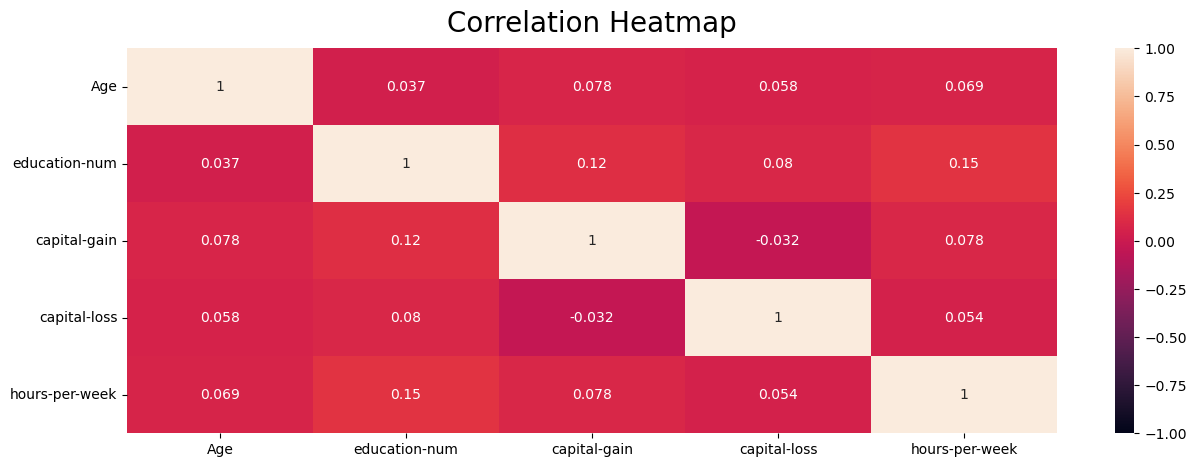

In [17]:
plt.figure(figsize=(15,5))
heatmap=sns.heatmap(corrmat,vmin=-1,vmax=1,annot=True)
heatmap.set_title("Correlation Heatmap",fontdict={'fontsize':20},pad=12)

### Exploratory Data Analysis(EDA)

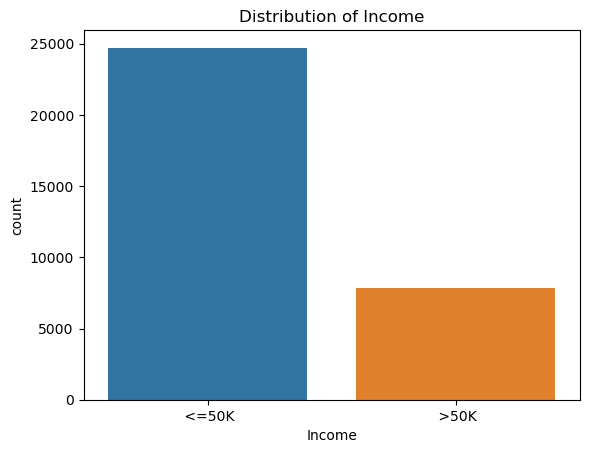

In [18]:
#visualize the distribution of income
sns.countplot(x="Income",data=income)
plt.title("Distribution of Income")
plt.xlabel('Income')
plt.ylabel("count")
plt.show()


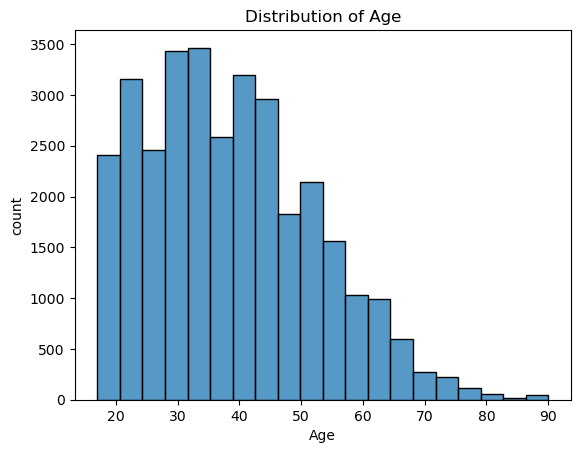

In [19]:
#visualize the distribution of Age
sns.histplot(income["Age"],bins=20)
plt.title("Distribution of Age")
plt.xlabel('Age')
plt.ylabel("count")
plt.show()

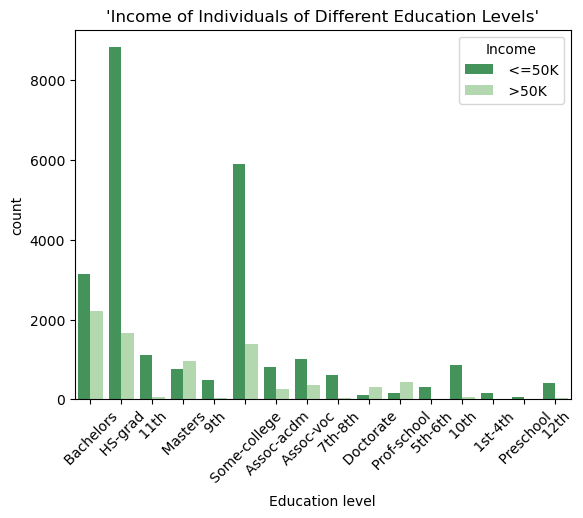

In [57]:
#visualize the income distribution by education level
sns.countplot(x="education",hue="Income",palette="Greens_r",data=income)
plt.title("'Income of Individuals of Different Education Levels'")
plt.xlabel('Education level')
plt.ylabel("count")
plt.xticks(rotation=45)
plt.legend(title='Income',loc='upper right')
plt.show()

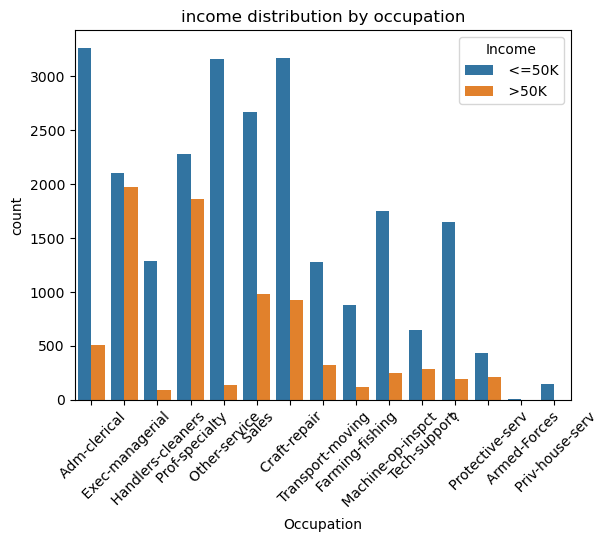

In [21]:
#visualize the income distribution by occupation
rotation=45
sns.countplot(x="occupation",hue="Income",data=income)
plt.title("income distribution by occupation")
plt.xlabel('Occupation')
plt.ylabel("count")
plt.xticks(rotation=rotation)
plt.legend(title='Income',loc='upper right')
plt.show()

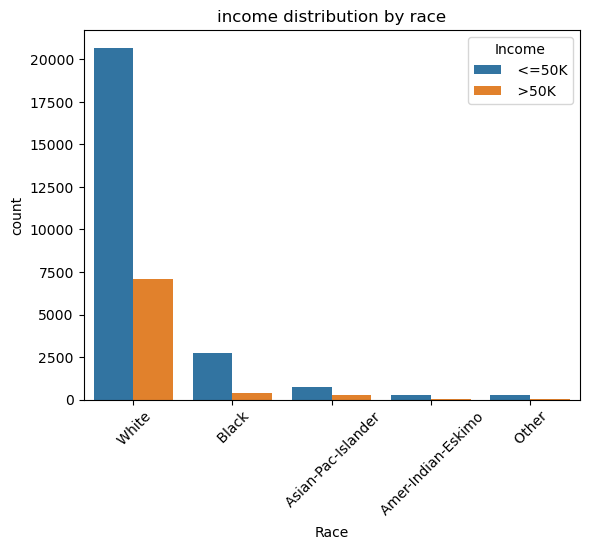

In [22]:
#visualize the income distribution by race
rotation=45
sns.countplot(x="race",hue="Income",data=income)
plt.title("income distribution by race")
plt.xlabel('Race')
plt.ylabel("count")
plt.xticks(rotation=rotation)
plt.legend(title='Income',loc='upper right')
plt.show()


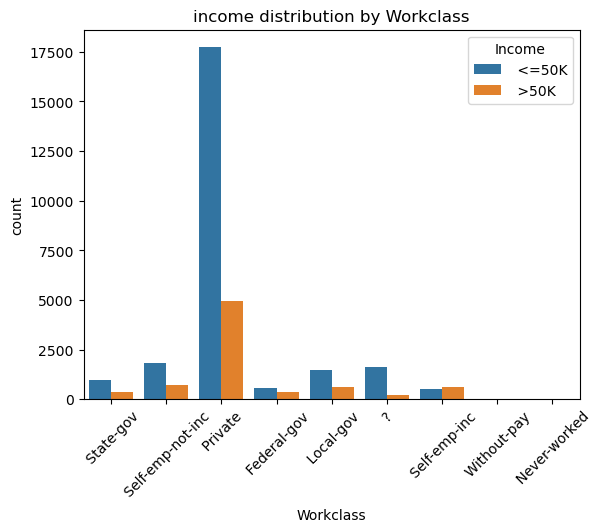

In [23]:
#visualize the income distribution by workclass
rotation=45
sns.countplot(x="workclass",hue="Income",data=income)
plt.title("income distribution by Workclass")
plt.xlabel('Workclass')
plt.ylabel("count")
plt.xticks(rotation=rotation)
plt.legend(title='Income',loc='upper right')
plt.show()

In [40]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [25]:
from sklearn import preprocessing

In [31]:
lab_enc=preprocessing.LabelEncoder()

In [35]:
x=income.copy()

In [36]:
for col in x:
    x[col]=lab_enc.fit_transform(x[col].values)

In [37]:
from imblearn.over_sampling import SMOTE

smote=SMOTE()

#fit predictor and target variable
x_smote,y_smote=smote.fit_resample(x.iloc[:,0:-1],x['Income'])

print('original dataset shape', len(x))
print('Resampled dataset shape', len(y_smote))

original dataset shape 32561
Resampled dataset shape 49440


In [38]:
X=x_smote
Y=y_smote

In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [43]:
from sklearn.linear_model import LogisticRegression

In [45]:
log_reg=LogisticRegression()

In [46]:
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [47]:
y_pred=log_reg.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [51]:
#compute evaluation matrics

acc=accuracy_score(Y_test,y_pred)
precision=precision_score(Y_test,y_pred,pos_label=1)
recall=recall_score(Y_test,y_pred,pos_label=1)
f1=f1_score(Y_test,y_pred,pos_label=1)
roc_auc=roc_auc_score(Y_test,y_pred)

In [53]:
#print the evaluation matrics

print("Accuracy: ",acc)
print("Precison: ",precision)
print("Recall: ", recall)
print("f1_score: ",f1)
print("ROC_AUC: ",roc_auc)


Accuracy:  0.7712378640776699
Precison:  0.7641509433962265
Recall:  0.7854545454545454
f1_score:  0.7746563060370592
ROC_AUC:  0.771220589859715
